# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [34]:
import pandas as pd
from keras.datasets import mnist
from plotnine import *
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

/Users/christopherrivera/anaconda3/envs/aind/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

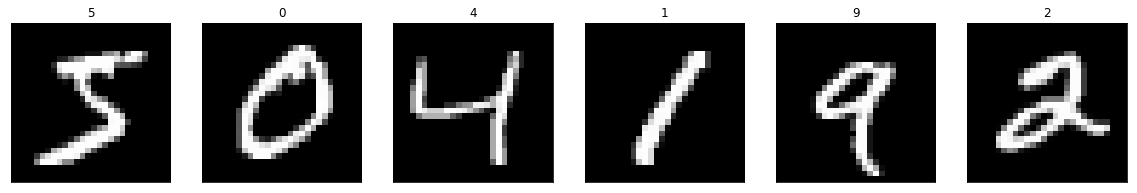

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

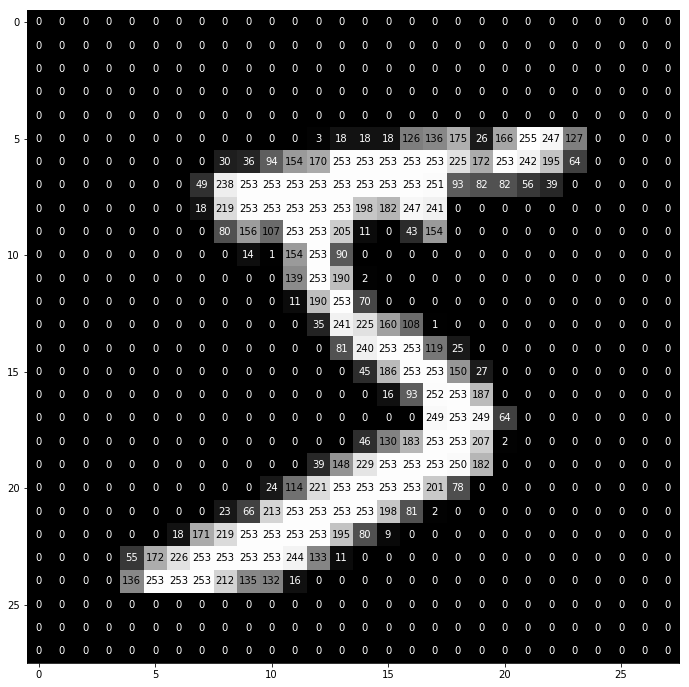

In [36]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [37]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

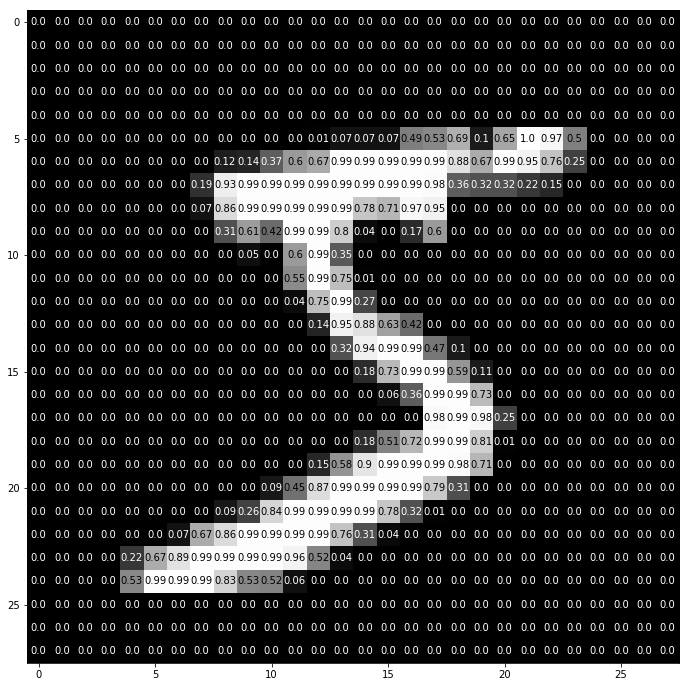

In [38]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [39]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [9]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.7200%


### 9. Train the Model

In [10]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.2779 - acc: 0.9150 - val_loss: 0.1380 - val_acc: 0.9599

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0100%


## Mini Project

The goal of this is to train and test different models to determine how this will improve performance. 




### 0. Create functions for building the MLP to iterate on. 

In [149]:
def build_image_mlp( layers=None,input_shape=12, activation='relu', optimizer='rmsprop', dropout = 0.2, nclasses=10): 
    """ Helper function to build an multilayer perceptron for image classification
    Note 
    
    Args: 
        input_shape(int): the dimension size of the input (assume n*n)
        layers(list): list of ints, with each representing the number of nodes for the dense layers
        activation(str): The activation layer type
        optimizer(str, optimizer): either a string or optimizer class
        droput(float): dropout
        nclasses(int): the number of classes
    Returns: 
        constructed_model
    """
    
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    
    
    # add the layers
    for i in range(len(layers)):
        model.add(Dense(layers[i], activation=activation))
        model.add(Dropout(dropout))
    
    # add the decision layer
    model.add(Dense(nclasses,activation='softmax' ))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])

    return model

def train_and_evaluate_model(xtrain, ytrain, xtest, ytest, layers, input_shape, activation='relu', optimizer='rmsprop', dropout=0.2, description='Model', 
                             epochs = 10, batch_size =128):
    """ set up model, trains it and evaluates it"""
    
    model = build_image_mlp(layers, input_shape, activation, optimizer, dropout)
    
    # evaluate the model initially on test and train
    score = model.evaluate(xtrain, ytrain, verbose = 0)
    init_train_accuracy = accuracy = 100*score[1]
    
    score = model.evaluate(xtest, ytest, verbose=0)
    init_test_accuracy = accuracy = 100*score[1]
    
    # train the model 
    fname = 'mnist.{}.best.hdf5'.format(description)
    checkpointer = ModelCheckpoint(filepath=fname, 
                               verbose=1, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)
    
    # load the model and evalute
    model.load_weights(fname)

    # evalute after trainint
    score = model.evaluate(xtrain, ytrain, verbose = 0)
    final_train_accuracy = accuracy = 100*score[1]
    
    score = model.evaluate(xtest, ytest, verbose=0)
    final_test_accuracy = accuracy = 100*score[1]
    
    # organize the data into a data frame
    df = pd.DataFrame({'init_test_accuracy': init_test_accuracy, 
                       'init_train_accuracy': init_train_accuracy,
                       'test_accuracy': final_test_accuracy,
                       'train_accuracy': final_train_accuracy,
                       'filename': fname
                      },
                      index = [description]
                     )
    
    return df


#### Test the code

In [15]:
xtrain = X_train
ytrain = y_train
xtest = X_test
ytest = y_test
layers = [2,2]
activation = 'relu'
description='Model'
input_shape = X_train.shape[1:]

test = train_and_evaluate_model(xtrain, ytrain, xtest, ytest, layers, input_shape, 
                                description='Model')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 33us/step - loss: 2.1507 - acc: 0.1763 - val_loss: 2.0161 - val_acc: 0.2195

In [16]:
test

filename  init_test_accuracy  init_train_accuracy  \
Model  mnist.Model.best.hdf5               13.88            13.758333   

       test_accuracy  train_accuracy  
Model          36.37       36.526667

### 1 Increase (or decrease) the number of nodes in each hidden layer). Any evidence of underfitting or overfitting. 

Below, I will iterate through different node sizes increasing by factor of 2. 

In [20]:
layer_sizes = [2**i for i in range(1,12)]
layer_sizes

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [22]:
results = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [ls,ls], input_shape, description='LayerSize_{}'.format(ls))
           for ls in layer_sizes]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 30us/step - loss: 2.3019 - acc: 0.1128 - val_loss: 2.3019 - val_acc: 0.1060

In [24]:
# analyze the results
results = pd.concat(results)

In [65]:
results_df = results.reset_index()
results_df = results_df.melt(value_vars=['test_accuracy', 'train_accuracy'], id_vars = 'index')
results_df = results_df.rename({'index':'model', 'value':'accuracy', 'variable':'DataSet'},axis = 1)
results_df['model'] = results_df['model'].apply(lambda x: int(x.split('_')[1]))
results_df['dataset'] = results_df['DataSet'].apply(lambda x: x.split('_')[0])
results_df['error'] = np.round((100-results_df['accuracy'])/100,2)
results_df.head()

model        DataSet  accuracy dataset  error
0      2  test_accuracy     30.17    test   0.70
1      4  test_accuracy     70.42    test   0.30
2      8  test_accuracy     87.04    test   0.13
3     16  test_accuracy     92.63    test   0.07
4     32  test_accuracy     95.63    test   0.04

/Users/christopherrivera/anaconda3/envs/aind/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/christopherrivera/anaconda3/envs/aind/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:76: UserWarning: geom_path: Removed 2 rows containing missing values.
  warn(msg.format(n1-n2))


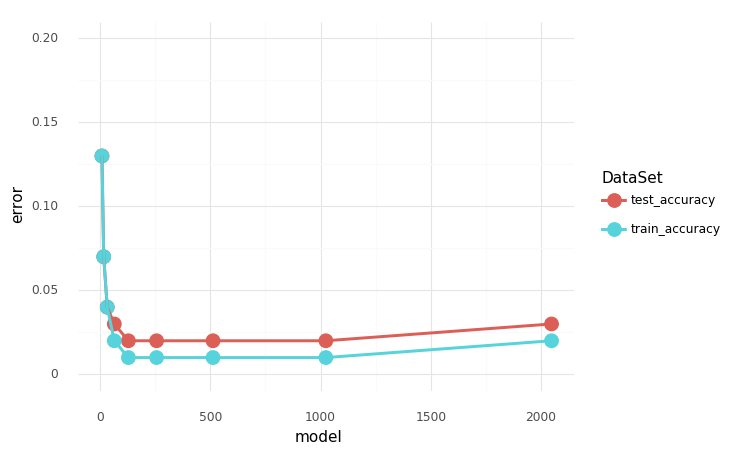

<ggplot: (-9223372036518527428)>

In [67]:
# plot hte results
p1 = (ggplot(results_df, aes(x = 'model', y= 'error', color ='DataSet')) + 
      geom_point(size = 5)+ geom_line(size =1.2) + theme_minimal() + ylim(0,0.2) 
     ) ;
p1

#### Remark
There does appear to be some evidence of overfitting. As we can see from the grapshs from above the test accuracy seems to be diverging slowly from the train accuracy. Its not a dramatic as we are expecting likely because the algorithm is saveing the most accurate on the training set. 

### 2 Increase (or decrease) the number of layers in each hidden layer). Any evidence of underfitting or overfitting. 

In [71]:
number_layers  = [2**i for i in range(0,5)]
number_layers

[1, 2, 4, 8, 16]

In [ ]:
results2 = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [512]*n, input_shape, description='NumberLayers_{}'.format(n))
           for n in number_layers]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.3103 - acc: 0.9089 - val_loss: 0.1483 - val_acc: 0.9582

In [131]:
def format_results(df, description ='Number Layers'):
    df = pd.concat(df)
    df = df.copy()
    df = df.reset_index()
    df = df.melt(value_vars=['test_accuracy', 'train_accuracy'], id_vars = 'index')
    df = df.rename({'index':'model', 'value':'accuracy', 'variable':'DataSet'},axis = 1)
    df[description] = df['model'].apply(lambda x: float(x.split('_')[1]))
    df['dataset'] = df['DataSet'].apply(lambda x: x.split('_')[0])
    df['error'] = np.round((100-df['accuracy']),2)
    return df

In [132]:
res2 = format_results(results2)

In [133]:
res2

model         DataSet   accuracy  Number Layers dataset  error
0   NumberLayers_1   test_accuracy  98.110000            1.0    test   1.89
1   NumberLayers_2   test_accuracy  98.000000            2.0    test   2.00
2   NumberLayers_4   test_accuracy  97.610000            4.0    test   2.39
3   NumberLayers_8   test_accuracy  96.870000            8.0    test   3.13
4  NumberLayers_16   test_accuracy  95.870000           16.0    test   4.13
5   NumberLayers_1  train_accuracy  99.101667            1.0   train   0.90
6   NumberLayers_2  train_accuracy  98.971667            2.0   train   1.03
7   NumberLayers_4  train_accuracy  98.751667            4.0   train   1.25
8   NumberLayers_8  train_accuracy  97.686667            8.0   train   2.31
9  NumberLayers_16  train_accuracy  96.145000           16.0   train   3.86

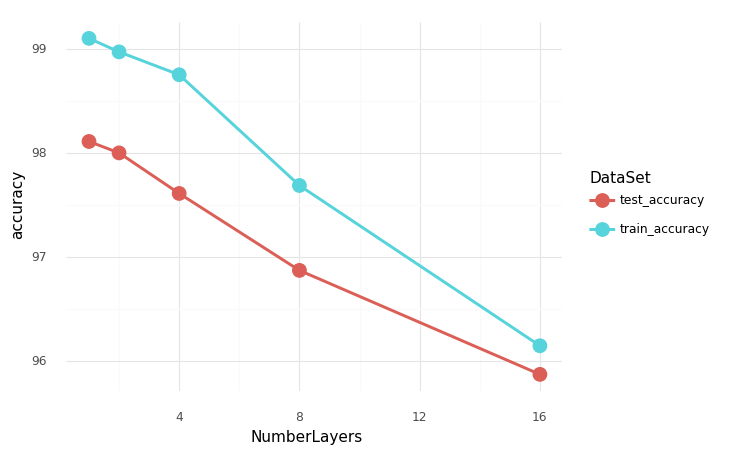

<ggplot: (-9223372036494907767)>

In [97]:
# plot hte results
p2 = (ggplot(res2, aes(x = 'NumberLayers', y= 'accuracy', color ='DataSet')) + 
      geom_point(size = 5)+ geom_line(size =1.2) + theme_minimal());
p2

### Remark

Its not clear to me whether the network is overfitting per se. As we add more layers, the network is actually doing worse. 
So i in a way we are increasing the bias of the network as a function of the Number of Layers.

### Remove the dropout layers in the network. Do you see evidence of overfitting? 

To do this I will just change the dropout. 

In [101]:
dropout = [0.2,0.1,0.05,0.025,0.0125,0]
results3 = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [512,512], input_shape, dropout = d,  description='Dropout_{}'.format(d))
           for d in dropout]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.2753 - acc: 0.9153 - val_loss: 0.1210 - val_acc: 0.9664

In [134]:
res3 = format_results(results3, description ='Dropout')
res3

model         DataSet   accuracy  Dropout dataset  error
0      Dropout_0.2   test_accuracy  98.020000   0.2000    test   1.98
1      Dropout_0.1   test_accuracy  97.980000   0.1000    test   2.02
2     Dropout_0.05   test_accuracy  97.890000   0.0500    test   2.11
3    Dropout_0.025   test_accuracy  97.400000   0.0250    test   2.60
4   Dropout_0.0125   test_accuracy  97.750000   0.0125    test   2.25
5        Dropout_0   test_accuracy  98.130000   0.0000    test   1.87
6      Dropout_0.2  train_accuracy  99.061667   0.2000   train   0.94
7      Dropout_0.1  train_accuracy  98.988333   0.1000   train   1.01
8     Dropout_0.05  train_accuracy  99.006667   0.0500   train   0.99
9    Dropout_0.025  train_accuracy  98.221667   0.0250   train   1.78
10  Dropout_0.0125  train_accuracy  98.383333   0.0125   train   1.62
11       Dropout_0  train_accuracy  99.110000   0.0000   train   0.89

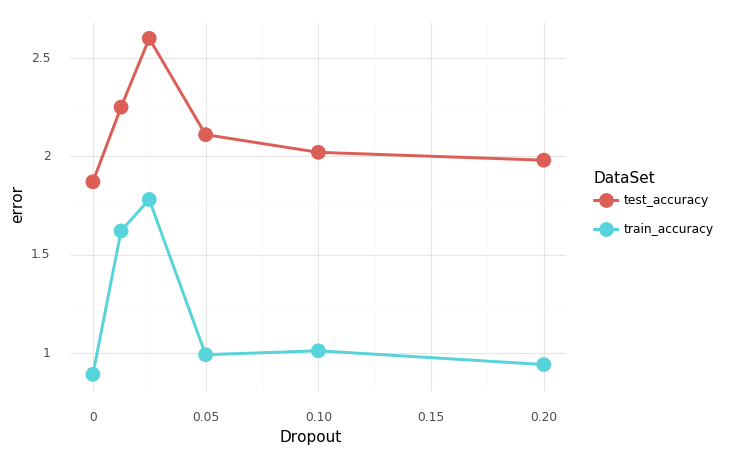

<ggplot: (367303176)>

In [135]:
# plot hte results
p3 = (ggplot(res3, aes(x = 'Dropout', y= 'error', color ='DataSet')) + 
      geom_point(size = 5)+ geom_line(size =1.2) + theme_minimal());
p3

### Remarks

The dropout is truly helping with the performance of the network (not by much thought). The model is overfitting a little by about 1%. Changing the dropit does not seem to help that much? 

### Remove the ReLU activation functions. Does the test accuracy decrease? 

In [138]:
activations = ['relu','sigmoid', 'selu', 'tanh','linear'] 
results3 = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [512,512], input_shape, activation=a,  description='Activation_{}'.format(a))
           for a in activations]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.2783 - acc: 0.9145 - val_loss: 0.1148 - val_acc: 0.9656

In [141]:
res3 =pd.concat(results3).reset_index()
res3.sort_values('test_accuracy')[['index', 'test_accuracy']]

index  test_accuracy
4   Activation_linear          91.62
2     Activation_selu          97.29
3     Activation_tanh          97.61
1  Activation_sigmoid          97.69
0     Activation_relu          97.88

### Remarks: 
As we can see it decreased the test accuracy. 

### Rmoeve the image pre-processing step with dividing every pixel by 255. Does the accuracy decrease?

In [142]:
results4 = train_and_evaluate_model(xtrain*255, ytrain*255, xtest, ytest, [512,512], input_shape)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.2736 - acc: 0.9142 - val_loss: 0.1374 - val_acc: 0.9567

In [143]:
results4

filename  init_test_accuracy  init_train_accuracy  \
Model  mnist.Model.best.hdf5                3.81                 4.23   

       test_accuracy  train_accuracy  
Model          97.71       98.948333

### Remarks 
It did not impove test accuracy. It was a little depressed. 

### Try a different optimizer, such as stochastic gradient descent

In [145]:
optimizers =['sgd','rmsprop', 'adam', 'adagrad']


results5 = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [512,512], input_shape, optimizer = o,  description='Optimizer_{}'.format(o))
           for o in optimizers]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 153us/step - loss: 1.3127 - acc: 0.6590 - val_loss: 0.6106 - val_acc: 0.8733

In [148]:
pd.concat(results5)

filename  init_test_accuracy  \
Optimizer_sgd          mnist.Optimizer_sgd.best.hdf5                9.13   
Optimizer_rmsprop  mnist.Optimizer_rmsprop.best.hdf5                9.18   
Optimizer_adam        mnist.Optimizer_adam.best.hdf5               10.90   
Optimizer_adagrad  mnist.Optimizer_adagrad.best.hdf5               16.67   

                   init_train_accuracy  test_accuracy  train_accuracy  
Optimizer_sgd                 9.031667          93.50       93.258333  
Optimizer_rmsprop             9.936667          97.61       98.790000  
Optimizer_adam               11.240000          98.13       99.291667  
Optimizer_adagrad            16.081667          98.14       99.423333

### Remarks:
The optimizers did not help much in this case

### Increase (or decrease) the batch size. 

In [ ]:
batches = [2**(i+1) for i in range(10) ]

results6 = [train_and_evaluate_model(xtrain, ytrain, xtest, ytest, [512,512], input_shape, batch_size=bs,  description='BatchSize_{}'.format(bs))
           for bs in batches]

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 198s 4ms/step - loss: 0.5778 - acc: 0.9180 - val_loss: 0.4196 - val_acc: 0.9532

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]